In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

### IMPORTED THE REQUIRED LIBRARIES 

### LOADING THE DATA

In [49]:
df=pd.read_csv("C:/Users/ambee/OneDrive/Desktop/EXPOSYS DATA LABS/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [50]:
df.shape

(50, 4)

#### DATA SET CONTAINS 4 COLUMNS AND 50 ROWS

In [51]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [53]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

#### FINFING THE NULL VALUES

In [54]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

### No Null Values are found

### DATA VISUALIZATION

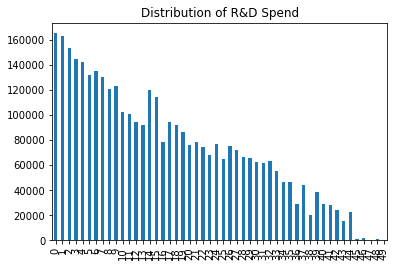

In [55]:
df["R&D Spend"].plot(kind="bar",title="Distribution of R&D Spend")
plt.show()

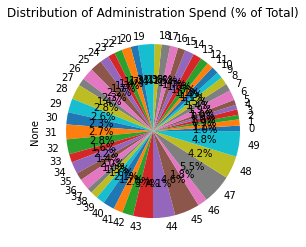

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total expenses (assuming other columns represent expenses)
total_expenses = df.sum(axis=1)

# Calculate Administration spend as a percentage of total expenses
administration_pct = (df["Administration"] / total_expenses) * 100

# Create the pie chart
administration_pct.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Administration Spend (% of Total)")
plt.show()

#### PAIRPLOT

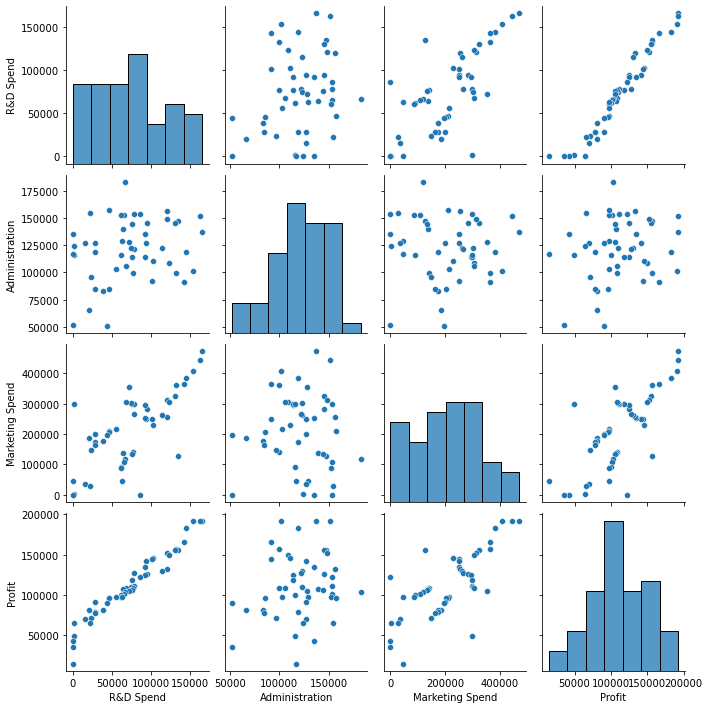

In [57]:
sns.pairplot(df)
plt.show()

#### VIEWING THE CORELATION BETWEEN COLUMNS

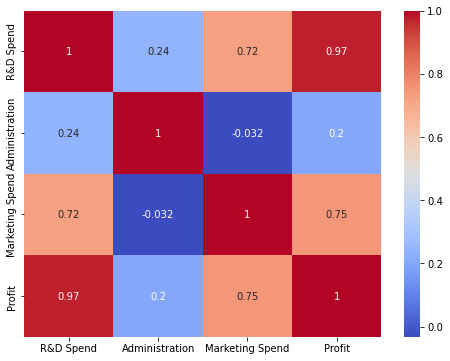

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

#### Feature Selection
#### Features: 'R&D Spend', 'Administration', 'Marketing Spend'
#### Target: 'Profit'

In [59]:

X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

### IMPORATING THE REQUIRED MACHINE LEARNING LIBRARIES

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Data Splitting
#### Split the data into training and test sets (80% train, 20% test)

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building
#### Train multiple regression models

### 1. Linear Regression

In [62]:

lr_model = LinearRegression().fit(X_train, y_train)

### 2. Decision Tree Regression

In [63]:

dt_model = DecisionTreeRegressor().fit(X_train, y_train)

### 3. Random Forest Regression

In [64]:

rf_model = RandomForestRegressor().fit(X_train, y_train)

### 4. Support Vector Regression

In [65]:

svr_model = SVR().fit(X_train, y_train)

### 5. Gradient Boosting

In [66]:

gb_model = GradientBoostingRegressor().fit(X_train, y_train)

### Model Prediction
#### Predict on the test set using all models

In [67]:

y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

### Model Evaluation
#### Create a function to calculate and print evaluation metrics

In [68]:

def print_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

In [69]:
# Print metrics for all models
print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_svr, "SVR")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression - MAE: 6979.1522523704, MSE: 80926321.22295156, RMSE: 8995.905803361413, R2 Score: 0.9000653083037321
Decision Tree - MAE: 6752.682999999995, MSE: 76899170.09800991, RMSE: 8769.217188438766, R2 Score: 0.9050383763983088
Random Forest - MAE: 6409.229029999971, MSE: 80775105.84557183, RMSE: 8987.497195858914, R2 Score: 0.900252041889169
SVR - MAE: 22844.10930188185, MSE: 955479565.0702635, RMSE: 30910.832487499647, R2 Score: -0.1799072825060064
Gradient Boosting - MAE: 8057.586869585533, MSE: 76488651.7367968, RMSE: 8745.779081179491, R2 Score: 0.9055453193217423


## Comparison of Metrics:
### Model:	                 MAE	   MSE  	        RMSE	            R² Score
#### Linear Regression:	6979.15	;   80, 926, 321;	  8995.91 ;	          0.9001
#### Decision Tree:    	 10,926.72;	   319,876,763;	    17,885.10;	           0.6050
#### Random Forest:	    6510.51;	 93,275,923;	       9657.95;	           0.8848
#### SVR:	                  22,844.11;	 955,479,565;	  30,910.83;          -0.1799
#### Gradient Boosting:	8600.02;	85, 846, 621;	  9265.35;	          0.8940

#### FROM ABOVE REGRESSIONS MODEL'S EVALUATION METRICS :
#### LINEAR REGRESSION 

#### First, train the Linear Regression model (only once)

In [70]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

### Function to predict profit based on positional arguments (no need to specify argument names)

In [71]:

def predict_profit(*args):
    # Calculate mean values for Administration and Marketing Spend
    admin_mean = X_train['Administration'].mean()
    marketing_mean = X_train['Marketing Spend'].mean()
    
    # Extract values based on position; if not provided, use defaults
    r_and_d_spend = args[0] if len(args) > 0 and args[0] is not None else X_train['R&D Spend'].mean()
    administration_cost = args[1] if len(args) > 1 and args[1] is not None else admin_mean
    marketing_spend = args[2] if len(args) > 2 and args[2] is not None else marketing_mean

    # Create input array with the available data
    input_data = np.array([[r_and_d_spend, administration_cost, marketing_spend]])

    # Make prediction using the pre-trained linear regression model
    predicted_profit = linear_regression_model.predict(input_data)

    return predicted_profit[0]

#### Testing the function with different cases (without specifying argument names):

In [72]:
# 1. Only R&D Spend is entered (positional)
predicted_profit = predict_profit(160000)
print(f"Predicted Profit (only R&D Spend): ${predicted_profit:.2f}")

Predicted Profit (only R&D Spend): $181812.52


In [73]:
# 2. R&D Spend and Marketing Spend are entered (positional)
predicted_profit = predict_profit(160000, None, 300000)
print(f"Predicted Profit (R&D Spend and Marketing Spend): ${predicted_profit:.2f}")

Predicted Profit (R&D Spend and Marketing Spend): $183819.88


In [74]:
# 3. Only Marketing Spend is entered (positional)
predicted_profit = predict_profit(None, None, 300000)
print(f"Predicted Profit (only Marketing Spend): ${predicted_profit:.2f}")

Predicted Profit (only Marketing Spend): $117659.08


In [75]:
# 4. All three values are entered (positional)
predicted_profit = predict_profit(160000, 130000, 300000)
print(f"Predicted Profit (all values): ${predicted_profit:.2f}")

Predicted Profit (all values): $183218.23


In [76]:
# 5. No values entered (all defaults used)
predicted_profit = predict_profit()
print(f"Predicted Profit (no values entered): ${predicted_profit:.2f}")

Predicted Profit (no values entered): $115651.72


In [33]:
print(predict_profit(17000,23))

75099.66431201264
